# [E-03]CmeraSticker_CatWhiskers

# 1. 디렉토리만들고 파일 연결해주기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("힇힇")

힇힇


# 2. 사진 준비 및 가지고 오기

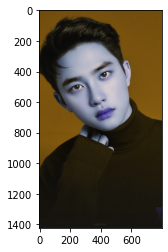

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jfif'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관하기
plt.imshow(img_bgr)
plt.show()

# 파일 확장자명 주의하기, 출력이 안 될 수 있다
# 얼굴이 가려지면 얼굴로 인식 안 함...

# 3. 사진색 보정하기

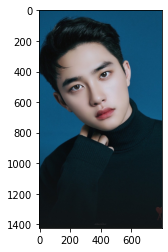

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸지 않으면 스머프가 된다는 것을 잊지말기!!
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 4. 얼굴 검출하기

In [4]:
# detector를 선언하기
detector_hog = dlib.get_frontal_face_detector()
print("힇힇")

힇힇


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid),dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해줌
print("힇힇")

힇힇


rectangles[[(142, 297) (605, 759)]]


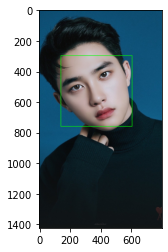

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있음
print(dlib_rects)   

# 찾은 얼굴 영역 좌표
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # dlib detector 는 dlib.rectangles 타입의 객체를 반환. dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있음

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 5. 얼굴 랜드마크

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("힇힇")

힇힇


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냄
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둠
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


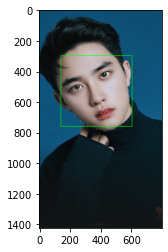

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 6. 스티커 적용하기

In [10]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[66]) # 코의 index는 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(429, 674)
(x,y) : (379,350)
(w,h) : (464,464)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(464, 464, 3)


In [12]:
# 스티커 이미지 좌표
refined_x = x - w // 2
refined_y = y #- h, 수염이 머리에서 -h를 임의로 지워봤는데 수염이 정상적인 위치에 자리함
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (147,350)


# refined_y = y - h를 하니까 수염이 머리에 위치했다

y값이 음수인 영역 때문인 것 같다.


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (147,350)


In [14]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
print("힇힇")

힇힇


# 고양이 수염이 투명해진다?

np.where(img_sticker==0,img_sticker, sticker_area)에서 2번째와 3번째 인자 순서를 바꿔주기

np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
                               🔽
np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)


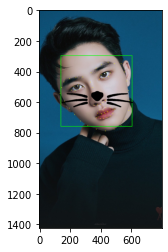

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# [E-03] 회고

이번 프로젝트는 저번 프로젝트보다 조오오오오오오오오오오옹오오오금 더 빨리 이해할 수 있었습니다.

사진을 준비하고, 경로 오타없이 가지고 오고ㅎㅎ 그 외에는 코드를 입력할 때 노드의 도움을 받았습니다. 그냥 노드가 캐리해주었습니다.
뭔가 다른 방법을 시도해보고 싶어도 어떤것을 시도하면 좋을지 모르겠고, 기초를 빨리 따라잡아야겠다는 생각 밖에 없어서 그저 하나하나 머릿속에 있는 도서관에 하나하나 채워간다는 느낌으로 수업을 들었습니다.

그나마 이번 Exploration을 진행하면서 새로운 걸 시도했다면 노드에는 PNG파일을 사용했는데, 다른 확장자명의 사진을 사용했다는 점인 것 같습니다.

처음에는 저의 사진을 이용했는데, 얼굴 그렇게 가리지도 않았는데... 그냥 광대에 살짝 브이가 닿인 정도였는데 얼굴로 인식을 안 해줬습니다ㅜ
그래서 저의 최애인 엑소 디오 사진으로 대체했습니다.🤗😊

그리고 고양이 수염 스티커를 불러오고 refined했는데 수염이 머리에서 자라났습니다.ㅎ
처음에는 '랜드마크 위치를 낮추면 수염이 내려가지 않을까?'하는 생각에 랜드마크 번호를 바꿨었는데, 왼쪽으로 가거나, 수염이 머리로 내려오지 않아서 다른 분들께 물어봤습니다.
(얼굴을 분석해서 각 위치에 랜드마크를 달았던건데ㅎ 지금 와서 보니까 참 단순하게 생각했었던 것 같습니다.)

y값이 음수인 영역을 이야기 해주시면서 refined_y = y - h 에서 '- h'를 한 번 빼고 돌려보라고 하시길래 했는데 정상적인 위치에 수염이 위치해 있었습니다.

수염을 코에 안착시키고 난 뒤, 마지막 문제 수염은 투명하고 배경이 흰색인 재앙(?)을 해결했어야 했는데요.
정리하고 있을 때 팀원분이 np.where에 대해 힌트를 주셔서 식에 들어있는 숫자를 변경해 보거나, 삭제만 하고 위치를 바꾼다는 생각을 못 하고 있었는데, 팀원분께서 np.where(img_sticker==0,img_sticker, sticker_area)에서 2번째와 3번째 인자 순서를 바꿔주면 된다고 하셔서 위치를 바꾸니 배경이 투명해지고 수염은 검게 돌아왔습니다.

저번 프로젝트와 달리 이번에는 혼자서 구글링으로 끝내는 것이 아니라 팀원분들과 퍼실님께 여쭤봐서 더 수월하고 빠르게 문제를 이해하며 해결할 수 있었습니다.

사진에 맞춰서 수염의 각도도 돌려주면 좋을텐데 구글링 해보니 cv2.getRotationMatrix2D()와 같은 메서드가 있다는 것을 알았지만, 방법을 몰라서 각도를 회전할 수 없었습니다ㅜ 다음에는 각도를 회전시킬 수 있도록 많은 코드를 보며 연습을 해봐야겠습니다.

그리고 아직 코드를 어떤 방식으로 실행해볼까 하는 정도 까지 생각을 하지 못해서 주어진 식 안에서 조금씩 바꿔서 결과를 다양하게 보려고 합니다:)